In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
# import os
# os.chdir('..')
import utils as ut
# os.chdir('notebooks')

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dropout, LSTM, Dense, Embedding

In [2]:
texts = ut.load_text_data('preprocessed_data.csv')
encoded, char_idx = ut.encode_characters(texts)
num_characters = len(char_idx) +1
n_prev = 200

In [3]:
X_train, X_test, y_train, y_test = ut.get_train_test_split(encoded,n_prev)
y_train = to_categorical(y_train, num_classes = num_characters)
y_test = to_categorical(y_test, num_classes = num_characters)

In [4]:
optimizer = keras.optimizers.Adam(learning_rate=.001)
model = Sequential()
model.add(Embedding(num_characters, 128, input_length=n_prev))
model.add(LSTM(128, input_shape=(n_prev,1)))
model.add(Dense(num_characters, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 128)          13184     
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 103)               13287     
Total params: 158,055
Trainable params: 158,055
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))
model.save(f'../models/character_modelv2_10_epochs.h5')

Epoch 1/10
20413/20413 [==============================] - 367s 18ms/step - loss: 1.7426 - accuracy: 0.4843 - val_loss: 1.6629 - val_accuracy: 0.5114
Epoch 2/10
20413/20413 [==============================] - 365s 18ms/step - loss: 1.5867 - accuracy: 0.5279 - val_loss: 1.5888 - val_accuracy: 0.5341
Epoch 3/10
20413/20413 [==============================] - 365s 18ms/step - loss: 1.5253 - accuracy: 0.5447 - val_loss: 1.5518 - val_accuracy: 0.5448
Epoch 4/10
20413/20413 [==============================] - 364s 18ms/step - loss: 1.4907 - accuracy: 0.5538 - val_loss: 1.5306 - val_accuracy: 0.5502
Epoch 5/10
20413/20413 [==============================] - 363s 18ms/step - loss: 1.4676 - accuracy: 0.5604 - val_loss: 1.5151 - val_accuracy: 0.5556
Epoch 6/10
20413/20413 [==============================] - 363s 18ms/step - loss: 1.4515 - accuracy: 0.5646 - val_loss: 1.5039 - val_accuracy: 0.5575
Epoch 7/10
20413/20413 [==============================] - 363s 18ms/step - loss: 1.4382 - accuracy: 0.5685

In [8]:
prompt = 'Once upon a midnight dreary, while I pondered, weak and weary,'

In [9]:
ut.generate_poetry_characters(prompt, 100, 1, model, char_idx)

 and the street of the most of the most of the most of the most of the most of the most of the most 


In [16]:
history2 = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))
model.save(f'../models/character_modelv2_40_epochs.h5')

Epoch 1/30
20413/20413 [==============================] - 363s 18ms/step - loss: 1.4072 - accuracy: 0.5761 - val_loss: 1.4804 - val_accuracy: 0.5654
Epoch 2/30
20413/20413 [==============================] - 363s 18ms/step - loss: 1.4020 - accuracy: 0.5775 - val_loss: 1.4769 - val_accuracy: 0.5679
Epoch 3/30
20413/20413 [==============================] - 363s 18ms/step - loss: 1.3980 - accuracy: 0.5783 - val_loss: 1.4785 - val_accuracy: 0.5669
Epoch 4/30
20413/20413 [==============================] - 363s 18ms/step - loss: 1.3940 - accuracy: 0.5797 - val_loss: 1.4762 - val_accuracy: 0.5673
Epoch 5/30
20413/20413 [==============================] - 363s 18ms/step - loss: 1.3908 - accuracy: 0.5803 - val_loss: 1.4733 - val_accuracy: 0.5696
Epoch 6/30
20413/20413 [==============================] - 363s 18ms/step - loss: 1.3881 - accuracy: 0.5810 - val_loss: 1.4741 - val_accuracy: 0.5686
Epoch 7/30
20413/20413 [==============================] - 363s 18ms/step - loss: 1.3853 - accuracy: 0.5816

In [20]:
ut.generate_poetry_characters(prompt, 100, 1, model, char_idx)

 and the supposed to the most expected the state of the supposed to the most expected the state of t


In [17]:
val_loss = history.history['val_loss'] + history2.history['val_loss']
train_loss = history.history['loss'] + history2.history['loss']
val_acc = history.history['val_accuracy'] + history2.history['val_accuracy']
train_acc = history.history['accuracy'] + history2.history['accuracy']
epochs = np.arange(0,len(val_loss))

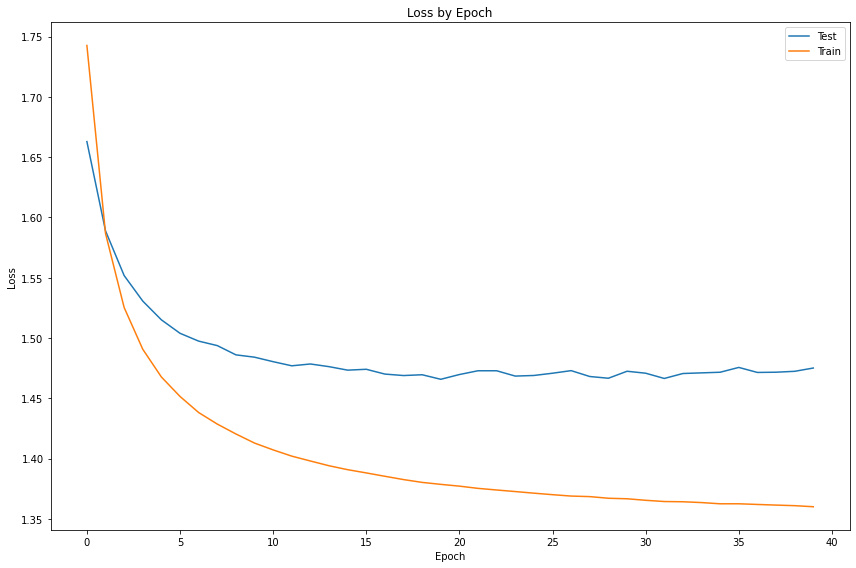

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(epochs, val_loss, label='Test')
ax.plot(epochs, train_loss, label='Train')
ax.set_title('Loss by Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
fig.tight_layout()

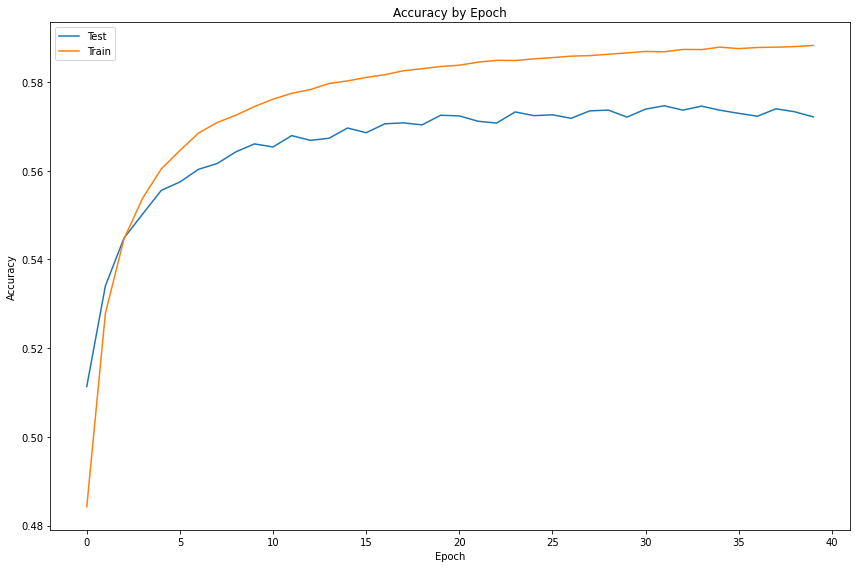

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(epochs, val_acc, label='Test')
ax.plot(epochs, train_acc, label='Train')
ax.set_title('Accuracy by Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend()
fig.tight_layout()